In [68]:
import os
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
def get_df(path):
    df = pd.read_csv(path, index_col='Unnamed: 0')
    return df

def get_val_nll(df):
    return df.val_or_test_nll.values[-1]

def get_last_epoch(df):
    return df.iloc[-1]

In [70]:
def get_best_hyperparameters(experiments_path, lr_0s, ns, prior_scales, random_states, weight_decays):
    columns = ['lr_0', 'n', 'prior_scale', 'random_state', 'weight_decay']
    df = pd.DataFrame(columns=columns)
    for n, prior_scale, random_state in itertools.product(ns, prior_scales, random_states):
        best_val_nll = np.inf
        best_hyperparameters = None
        for lr_0, weight_decay in itertools.product(lr_0s, weight_decays):
            model_name = 'learned_lr_0={}_n={}_prior_scale={}_random_state={}_weight_decay={}'\
            .format(lr_0, n, prior_scale, random_state, weight_decay)
            path =  '{}/{}.csv'.format(experiments_path, model_name)
            val_nll = get_val_nll(get_df(path))
            if val_nll < best_val_nll: best_val_nll = val_nll; best_hyperparameters = [lr_0, n, prior_scale, random_state, weight_decay]
        df.loc[df.shape[0]] = best_hyperparameters
    return df

In [71]:
experiments_path = '/cluster/tufts/hugheslab/eharve06/bdl-transfer-learning/experiments/tuned_CIFAR-10'
lr_0s = np.logspace(-1, -4, num=4)
ns = [1000]
prior_scales = np.logspace(0, 9, num=10)
random_states = [1001, 2001, 3001]
weight_decays = np.append(np.logspace(-2, -6, num=5), 0)
weight_decays = [0.0]
df = get_best_hyperparameters(experiments_path, lr_0s, ns, prior_scales, random_states, weight_decays)
df

,lr_0,n,prior_scale,random_state,weight_decay
0,0.0100,1000.0,1.000000e+00,1001.0,0.0
1,0.1000,1000.0,1.000000e+00,2001.0,0.0
2,0.0001,1000.0,1.000000e+00,3001.0,0.0
3,0.0100,1000.0,1.000000e+01,1001.0,0.0
4,0.1000,1000.0,1.000000e+01,2001.0,0.0
5,0.0100,1000.0,1.000000e+01,3001.0,0.0
6,0.0100,1000.0,1.000000e+02,1001.0,0.0
7,0.0100,1000.0,1.000000e+02,2001.0,0.0
8,0.0100,1000.0,1.000000e+02,3001.0,0.0
9,0.0100,1000.0,1.000000e+03,1001.0,0.0


In [78]:
experiments_path = '/cluster/tufts/hugheslab/eharve06/bdl-transfer-learning/experiments/retrained_CIFAR-10'

columns = ['n', 'prior_scale', 'random_state', 'method', 'test_acc', 'test_loss', 'test_nll', 
           'test_prior', 'train_acc', 'train_loss', 'train_nll', 'train_prior']
results_df = pd.DataFrame(columns=columns)

for row_index, row in df.iterrows():
    model_name = 'learned_lr_0={}_n={}_prior_scale={}_random_state={}_weight_decay={}'\
    .format(row.lr_0, int(row.n), row.prior_scale, int(row.random_state), row.weight_decay)
    path =  '{}/{}.csv'.format(experiments_path, model_name)
    last_epoch = get_last_epoch(get_df(path))
    results_row = [int(row.n), row.prior_scale, int(row.random_state), 'learned', 
                   last_epoch.val_or_test_acc, last_epoch.val_or_test_loss,
                   last_epoch.val_or_test_nll, last_epoch.val_or_test_prior, 
                   last_epoch.train_acc, last_epoch.train_loss, 
                   last_epoch.train_nll, last_epoch.train_prior]
    results_df.loc[results_df.shape[0]] = results_row

FileNotFoundError: [Errno 2] No such file or directory: '/cluster/tufts/hugheslab/eharve06/bdl-transfer-learning/experiments/retrained_CIFAR-10/learned_lr_0=0.01_n=1000_prior_scale=100000000.0_random_state=1001_weight_decay=0.0.csv'

In [ ]:
results_df

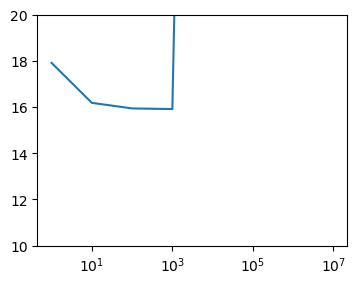

In [79]:
# TODO: If more seeds are added average over seeds
results_df = results_df.groupby(['n', 'prior_scale', 'method']).agg(lambda x: tuple(x))
columns = ['test_acc', 'train_acc']
for column in columns:
    results_df['{}_mean'.format(column)] = results_df[column].apply(lambda item: np.mean(item))
    results_df['{}_std'.format(column)] = results_df[column].apply(lambda item: np.std(item))
results_df = results_df.reset_index()

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(4, 3), dpi=100)
ax.plot(results_df.prior_scale, 100*(1-results_df.test_acc_mean))
ax.set_ylim([10,20])
ax.set_xscale('log')

In [45]:
results_df

,n,prior_scale,method,random_state,test_acc,test_loss,test_nll,test_prior,train_acc,train_loss,train_nll,train_prior,test_acc_mean,test_acc_std,train_acc_mean,train_acc_std
0,1000,1.000000e+00,learned,"(3001,)","(0.7915519664764401,)","(0.6523749838829038,)","(0.6523749838829038,)","(0.0,)","(1.000000119209289,)","(0.0160735866129398,)","(0.0160735866129398,)","(0.0,)",0.791552,0.0,1.0,0.0
1,1000,1.000000e+01,learned,"(3001,)","(0.8286394679069521,)","(0.727865344429016,)","(0.727865344429016,)","(0.0,)","(1.000000119209289,)","(8.679763792315498e-06,)","(8.679763792315498e-06,)","(0.0,)",0.828639,0.0,1.0,0.0
2,1000,1.000000e+02,learned,"(3001,)","(0.8286394679069521,)","(0.727865344429016,)","(0.727865344429016,)","(0.0,)","(1.000000119209289,)","(8.679763792315498e-06,)","(8.679763792315498e-06,)","(0.0,)",0.828639,0.0,1.0,0.0
3,1000,1.000000e+03,learned,"(3001,)","(0.8286394679069521,)","(0.727865344429016,)","(0.727865344429016,)","(0.0,)","(1.000000119209289,)","(8.679763792315498e-06,)","(8.679763792315498e-06,)","(0.0,)",0.828639,0.0,1.0,0.0
4,1000,1.000000e+04,learned,"(3001,)","(0.8286394679069521,)","(0.727865344429016,)","(0.727865344429016,)","(0.0,)","(1.000000119209289,)","(8.679763792315498e-06,)","(8.679763792315498e-06,)","(0.0,)",0.828639,0.0,1.0,0.0
5,1000,1.000000e+05,learned,"(3001,)","(0.8286394679069521,)","(0.727865344429016,)","(0.727865344429016,)","(0.0,)","(1.000000119209289,)","(8.679763792315498e-06,)","(8.679763792315498e-06,)","(0.0,)",0.828639,0.0,1.0,0.0
6,1000,1.000000e+06,learned,"(3001,)","(0.8286394679069521,)","(0.727865344429016,)","(0.727865344429016,)","(0.0,)","(1.000000119209289,)","(8.679763792315498e-06,)","(8.679763792315498e-06,)","(0.0,)",0.828639,0.0,1.0,0.0
7,1000,1.000000e+07,learned,"(3001,)","(0.8286394679069521,)","(0.727865344429016,)","(0.727865344429016,)","(0.0,)","(1.000000119209289,)","(8.679763792315498e-06,)","(8.679763792315498e-06,)","(0.0,)",0.828639,0.0,1.0,0.0
8,1000,1.000000e+08,learned,"(3001,)","(0.8286394679069521,)","(0.727865344429016,)","(0.727865344429016,)","(0.0,)","(1.000000119209289,)","(8.679763792315498e-06,)","(8.679763792315498e-06,)","(0.0,)",0.828639,0.0,1.0,0.0
9,1000,1.000000e+09,learned,"(3001,)","(0.7915519664764401,)","(0.6523749838829038,)","(0.6523749838829038,)","(0.0,)","(1.000000119209289,)","(0.0160735866129398,)","(0.0160735866129398,)","(0.0,)",0.791552,0.0,1.0,0.0
